## Importing the Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Data Collection and Analysis

In [2]:
# loading the data from csv file to a pandas Dataframe
df = pd.read_csv('Mall_Customers.csv')

In [4]:
# first five rows of the Dataframe
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# finding the number of rows and columns
df.shape

(200, 5)

In [7]:
# getting information of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# checking missing values

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## choosing Annual Income & Spending Score Column



In [11]:
X = df.iloc[:,[3,4]].values

In [12]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Choosing number of clusters

In [13]:
# WCSS - Within clusters sum of squares

# finding  wcss vlaue for different number of cluster

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=30)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

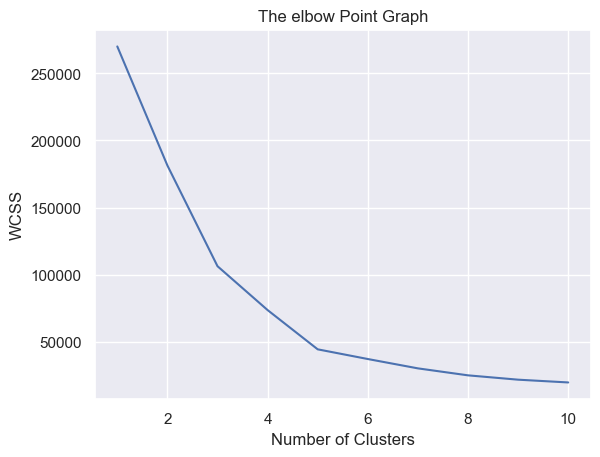

In [15]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum no of cluster = 5
Training the k-Mean Cluster Model

In [132]:
pip install kneed

In [134]:
# to calculate the cluster
from kneed import KneeLocator

kn = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')

In [136]:
print('No of Clusters: ',kn.knee)

No of Clusters:  5


In [16]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=30)

#return a label for each data point based on their cluster

Y = kmeans.fit_predict(X)

In [17]:
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 2 4 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 2 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0 2 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


## Visualizing all the clusters

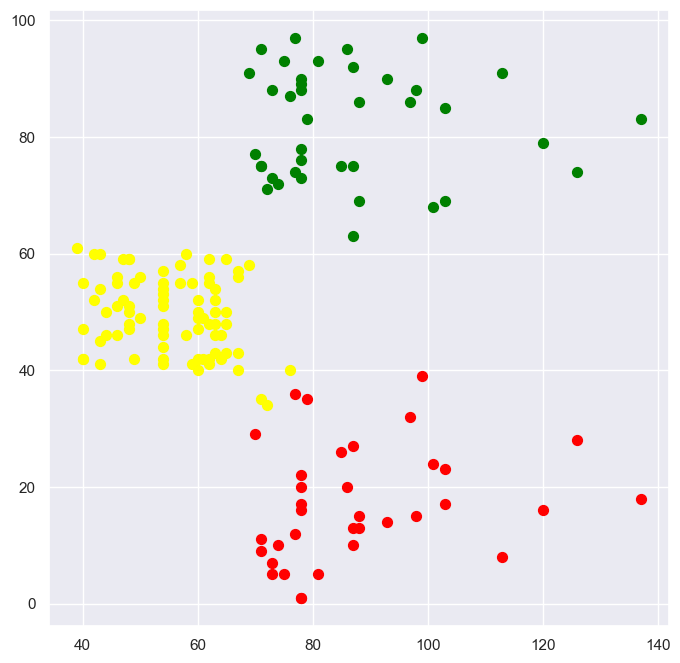

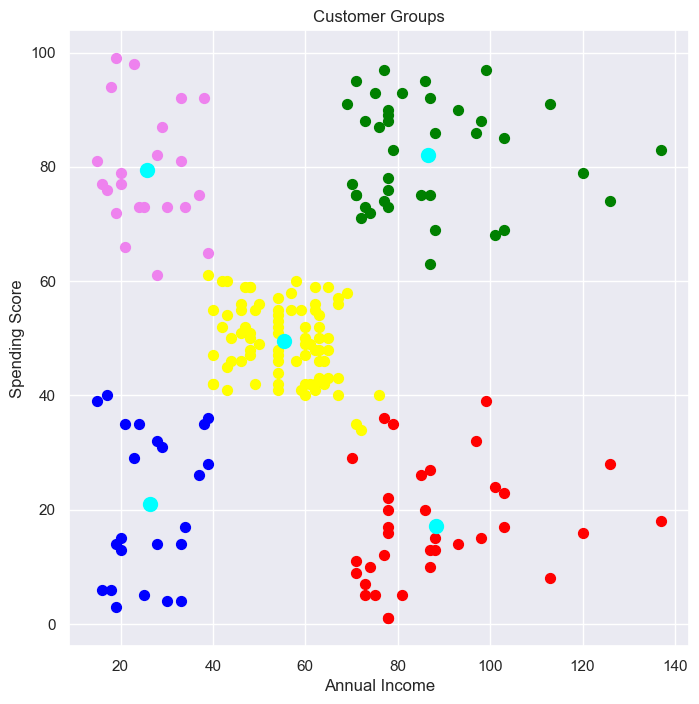

In [19]:
# Plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='yellow',label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='violet',label='Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='blue',label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100, c='cyan',label='Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [137]:
df['Cluster'] = Y

In [138]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,1
197,198,Male,32,126,74,0
198,199,Male,32,137,18,1


In [144]:
df['Cluster'].unique()

array([4, 3, 2, 0, 1])

In [145]:
df[df['Cluster']==0]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
123,124,Male,39,69,91,0
125,126,Female,31,70,77,0
127,128,Male,40,71,95,0
129,130,Male,38,71,75,0
131,132,Male,39,71,75,0
133,134,Female,31,72,71,0
135,136,Female,29,73,88,0
137,138,Male,32,73,73,0
139,140,Female,35,74,72,0
141,142,Male,32,75,93,0
